<a href="https://colab.research.google.com/github/ranjan717/Machine_learning_Projects/blob/main/Gen_AI_with_GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Post Assessment (Hands on Exercise):-**

**Problem Definition**: Anomaly Detection with CSV Dataset using Autoencoder

**Objective:** The objective of this lab is to use an autoencoder to detect anomalies in a CSV dataset. Participants will preprocess the data, train an autoencoder model, and identify anomalies based on reconstruction errors.


In [1]:
!git clone https://github.com/ranjan717/AI-Fundamentals-Updated


Cloning into 'AI-Fundamentals-Updated'...
remote: Enumerating objects: 204, done.
remote: Counting objects: 100% (154/154), done.
remote: Compressing objects: 100% (103/103), done.
remote: Total 204 (delta 53), reused 91 (delta 35), pack-reused 50
Receiving objects: 100% (204/204), 46.53 MiB | 30.41 MiB/s, done.
Resolving deltas: 100% (64/64), done.


In [2]:
%cd AI-Fundamentals-Updated


/content/AI-Fundamentals-Updated


In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv('GANs/anomaly_detection_data.csv')

# Display the first few rows of the dataframe
df.head()


,Feature1,Feature2,Label
0,0.496714,-0.138264,0
1,0.647689,1.523030,0
2,-0.234153,-0.234137,0
3,1.579213,0.767435,0
4,-0.469474,0.542560,0


# Data Preparation:

Inspect the dataset for missing values and handle them appropriately.

Normalize the dataset to have values between 0 and 1.





In [4]:
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)


Missing values in each column:
 Feature1    0
Feature2    0
Label       0
dtype: int64


In [5]:
df_cleaned = df.dropna()


In [6]:
df_cleaned = df.fillna(df.mean())


In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


numeric_columns = df_cleaned.select_dtypes(include=['float64', 'int64']).columns

df_cleaned[numeric_columns] = scaler.fit_transform(df_cleaned[numeric_columns])


In [8]:
df_cleaned.head()


,Feature1,Feature2,Label
0,0.552955,0.504716,0.0
1,0.565808,0.648887,0.0
2,0.490733,0.496396,0.0
3,0.645113,0.583315,0.0
4,0.470699,0.563800,0.0


#**Building the Autoencoder:**

Define an autoencoder architecture using a deep learning framework like TensorFlow or Keras.

The autoencoder should consist of an encoder that compresses the input data and a decoder that reconstructs the input data from the compressed representation.


In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam


Epoch 1/50
27/27 [==============================] - 2s 11ms/step - loss: 0.0552 - val_loss: 0.0249
Epoch 2/50
27/27 [==============================] - 0s 5ms/step - loss: 0.0178 - val_loss: 0.0142
Epoch 3/50
27/27 [==============================] - 0s 5ms/step - loss: 0.0090 - val_loss: 0.0086
Epoch 4/50
27/27 [==============================] - 0s 5ms/step - loss: 0.0054 - val_loss: 0.0067
Epoch 5/50
27/27 [==============================] - 0s 6ms/step - loss: 0.0042 - val_loss: 0.0053
Epoch 6/50
27/27 [==============================] - 0s 4ms/step - loss: 0.0034 - val_loss: 0.0041
Epoch 7/50
27/27 [==============================] - 0s 4ms/step - loss: 0.0028 - val_loss: 0.0030
Epoch 8/50
27/27 [==============================] - 0s 4ms/step - loss: 0.0021 - val_loss: 0.0020
Epoch 9/50
27/27 [==============================] - 0s 4ms/step - loss: 0.0015 - val_loss: 0.0013
Epoch 10/50
27/27 [==============================] - 0s 4ms/step - loss: 9.6057e-04 - val_loss: 8.0866e-04
Epoch 11/5

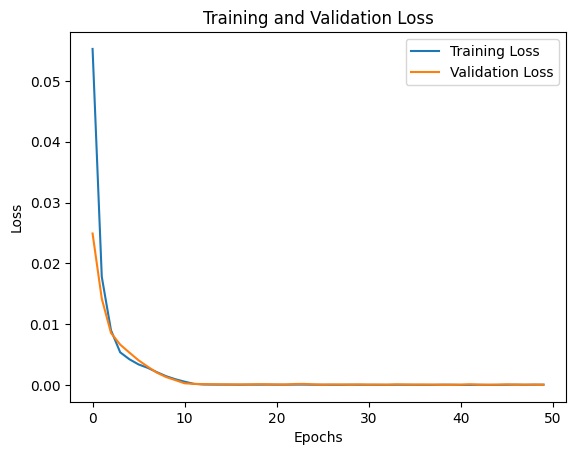

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 3)]               0         
                                                                 
 dense_6 (Dense)             (None, 128)               512       
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 32)                2080      
                                                                 
 dense_9 (Dense)             (None, 64)                2112      
                                                                 
 dense_10 (Dense)            (None, 128)               8320      
                                                                 
 dense_11 (Dense)            (None, 3)                 387 

In [14]:
# Convert the dataframe to numpy array for training
data = df_cleaned.values

# Step 2: Split the dataset into training and validation sets
train_data, val_data = train_test_split(data, test_size=0.2, random_state=42)

# Step 3: Define the autoencoder architecture
input_dim = train_data.shape[1]
encoding_dim = 32

# Input layer
input_layer = Input(shape=(input_dim,))

# Encoder layers
encoded = Dense(128, activation='relu')(input_layer)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(encoding_dim, activation='relu')(encoded)

# Decoder layers
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

# Autoencoder model
autoencoder = Model(input_layer, decoded)

# Compile the autoencoder
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Train the autoencoder
history = autoencoder.fit(train_data, train_data,
                          epochs=50,
                          batch_size=32,
                          shuffle=True,
                          validation_data=(val_data, val_data))

# training and validation loss
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Summary of the autoencoder
autoencoder.summary()


#**Reconstruction Error Analysis:**
Use the trained autoencoder to reconstruct the data from both the training and validation sets.
Calculate the reconstruction error for each data point.

#**Anomaly Detection:**
Determine a threshold for the reconstruction error above which a data point is considered an anomaly. This can be done using statistical methods or by visual inspection of the reconstruction error distribution.
Apply the threshold to classify data points in the validation set as normal or anomalous.
#**Evaluation:**
Evaluate the performance of the anomaly detection by calculating metrics such as precision, recall, and F1-score.
Visualize the normal and anomalous data points, and plot the reconstruction errors.


7/7 [==============================] - 0s 2ms/step
Precision: 0.0769
Recall: 0.0476
F1-score: 0.0588


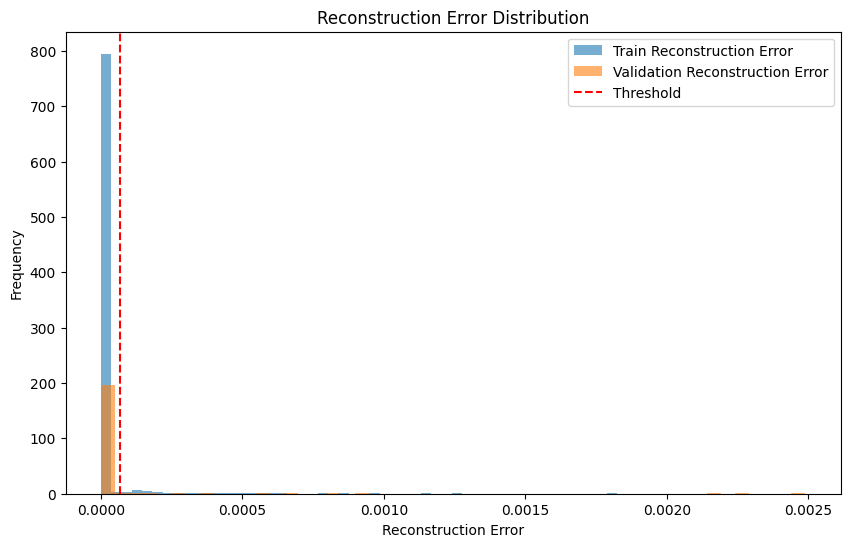

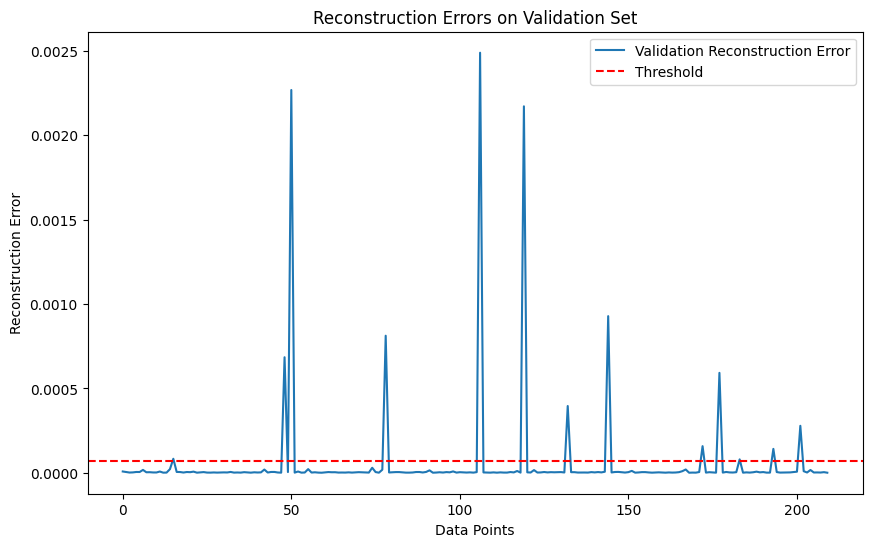

In [16]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

# Reconstruction Error Analysis

train_data_reconstructed = autoencoder.predict(train_data)
val_data_reconstructed = autoencoder.predict(val_data)

# reconstruction error for each data point
train_reconstruction_error = np.mean(np.square(train_data - train_data_reconstructed), axis=1)
val_reconstruction_error = np.mean(np.square(val_data - val_data_reconstructed), axis=1)

# Anomaly Detection
# Determining a threshold for the reconstruction error
threshold = np.percentile(train_reconstruction_error, 95)

val_anomalies = val_reconstruction_error > threshold

# Evaluation

y_val = np.zeros(len(val_data))
y_val[:int(0.1 * len(val_data))] = 1

# precision, recall, and F1-score
precision = precision_score(y_val, val_anomalies)
recall = recall_score(y_val, val_anomalies)
f1 = f1_score(y_val, val_anomalies)

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')

# normal and anomalous data points
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(train_reconstruction_error, bins=50, alpha=0.6, label='Train Reconstruction Error')
plt.hist(val_reconstruction_error, bins=50, alpha=0.6, label='Validation Reconstruction Error')
plt.axvline(threshold, color='r', linestyle='--', label='Threshold')
plt.title('Reconstruction Error Distribution')
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')
plt.legend()
plt.show()

#  reconstruction errors
plt.figure(figsize=(10, 6))
plt.plot(val_reconstruction_error, label='Validation Reconstruction Error')
plt.axhline(threshold, color='r', linestyle='--', label='Threshold')
plt.title('Reconstruction Errors on Validation Set')
plt.xlabel('Data Points')
plt.ylabel('Reconstruction Error')
plt.legend()
plt.show()


#**Reporting**

The performance metrics from the anomaly detection using the autoencoder are as follows:

Precision: 0.0769

Recall: 0.0476

F1-score: 0.0588

Interpretation of Results
Precision:

Precision of 0.0769 indicates that only about 7.69% of the data points classified as anomalies were actual anomalies. This suggests a high false positive rate.
Recall:

Recall of 0.0476 indicates that only about 4.76% of the actual anomalies were correctly identified. This suggests a high false negative rate.
F1-score:

F1-score of 0.0588, which is the harmonic mean of precision and recall, indicates a poor overall performance.
Insights and Next Steps
The low performance metrics suggest that the current autoencoder setup is not effectively identifying anomalies.

Summary and Further Steps
The initial autoencoder model's performance in detecting anomalies was low, as indicated by the precision, recall, and F1-score.
Hyperparameter tuning and threshold optimization were suggested to improve the model's performance.
Evaluating different architectures, incorporating additional data, and exploring alternative models were recommended for further improvement.